# Исследование данных о российском кинопрокате

**Описание проекта**


Заказчик этого исследования — Министерство культуры Российской Федерации.
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Последовательность выполнения проекта**

* Открытие файлов с данными и объединение их в один датафрейм
* Предобработка данных (обработка пропусков и дубликатов, изменение типов колонок). Добавление новых столбцов: 
    1. Столбец с информацией о годе проката;
    2. Два столбца: с именем и фамилией главного режиссёра и основным жанром фильма;
    3. Посчитать, какую долю от общего бюджета фильма составляет государственная поддержка.
* Проведение исследовательского анализа данных:
    1. Посмотреть, сколько фильмов выходило в прокат каждый год. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализировать, как эта доля менялась по годам. Сделать вывод о том, какой период полнее всего представлен в данных.
    2. Изучить, как менялась динамика проката по годам.
    3. С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года. Сравнить значения и сделать выводы. 
    4. Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположить, с чем это может быть связано.
* Исследование фильмов, получивших государственную поддержку
* Подведение выводов по исследованию

## Изучение данных из файлов и объединение датафреймов 
Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

Для начала импортируем нужные библиотеки

In [1]:
#импорт нужных библиотек
import pandas as pd
from IPython.display import display
import warnings
import datetime
import matplotlib.pyplot as plt

#отключение уведомлений об ошибке при замене исходного набора данных
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#показ всех колонок датафрейма
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.2f}'.format

Сохраним данные в два датафрейма

In [2]:
df = pd.read_csv('D:/Datasets/mkrf_movies.csv')
df_0 = pd.read_csv('D:/Datasets/mkrf_shows.csv')

Выведем информацию о них, чтобы понимать, какие типы данных находятся в столбцах

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Можно заметить, что в некоторых столбцах основного датафрейма находятся пропуски. Количество строк первого и второго датафрейма отличаются, первый больше. Кроме того многие столбцы первого датафрейма имеют тип `object`, в том числе и столбец `puNumber`, по которому мы будем объединять датафреймы. Исправим тип этого столбца. Всё остальное исправим в следующих пунктах.

In [5]:
df['puNumber'] = df['puNumber'].replace('нет', '0') #заменим одно артефактное значение, чтобы merge сработал

df['puNumber'] = df['puNumber'].astype('int64')
df = df.merge(df_0, on='puNumber', how='left') #затем объединяем таблицы

df.head() 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Всё сработало, теперь узнаем об обновлённом датафрейме побольше

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Всего в таблице 16 столбцов

4 столбца типа `float64`, 1 столбцец типа `int64` и 11 столбцов типа `object`

Согласно документации к данным:

* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма;
* box_office — сборы в рублях.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
puNumber,"7,486.00","135,178,527.64","38,382,177.41",0.00,"112,025,043.00","121,015,464.50","124,003,313.75","231,001,111.00"
refundable_support,332.00,"11,864,457.83","24,916,555.26",0.00,0.00,0.00,"15,000,000.00","180,000,000.00"
nonrefundable_support,332.00,"48,980,988.89","59,980,117.92",0.00,"25,000,000.00","30,000,000.00","40,375,000.00","400,000,000.00"
budget,332.00,"127,229,716.68","188,588,333.12",0.00,"42,000,000.00","68,649,916.00","141,985,319.50","2,305,074,303.00"
box_office,"3,158.00","76,478,696.16","240,353,122.82",0.00,"86,239.00","2,327,987.55","23,979,671.02","3,073,568,690.79"


Описание датафрейма даёт нам понимание, что во всех числовых столбцах есть минимальное значение, равное 0. В случае номера прокатного удостоверения это тот нолик, который мы сами и вставили ранее. В случае столбцов с бюджетом и со сборами - это янвые артефакты, в будущем с ними разберёмся.

## Предобработка данных

### Работа с пропусками

In [8]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Выбросим пропуски столбцов `production_country` и `film_studio`, так как их не так много, можем ими принебречь

Остальные пропуски не буду трогать, так как их не получиться адекватно обработать

In [9]:
df['production_country'] = df['production_country'].dropna() 
df['film_studio'] = df['film_studio'].dropna() 

### Изменение типов данных

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Сразу бросается тип столбца с рейтингом - он строчный. Посмотрим его получше

In [11]:
df['ratings'].value_counts().sort_index(ascending=False).head(10)

99%    4
98%    2
97%    3
94%    3
91%    3
90%    1
9.2    1
9.1    1
9.0    2
89%    1
Name: ratings, dtype: int64

Есть значения с процентами, их не так много. Разберёмся с ними

In [12]:
df['ratings'] = df['ratings'].str.replace('%','')

df['ratings'] = df['ratings'].astype('float64') #замена типа данных для заполнения пропусков

Теперь исправим полученные рейтинги в 99, 98 и тд

In [13]:
def ratings_func(row):
    rating = row['ratings']
    
    if rating > 10:
        return(rating / 10)
    else:
        return(rating)
    
df['ratings'] = df.apply(ratings_func, axis=1)
df['ratings'].value_counts().sort_index(ascending=False).head()

9.90    4
9.80    2
9.70    3
9.40    3
9.20    1
Name: ratings, dtype: int64

Теперь заменим категориальные значения столбца `age_restriction` на количественные для нашего же удобства

In [14]:
df['age_restriction'].replace(
    to_replace = ['«18+» - запрещено для детей', '«16+» - для детей старше 16 лет', '«12+» - для детей старше 12 лет', '«6+» - для детей старше 6 лет','«0+» - для любой зрительской аудитории'],
    value = ['18','16','12','6','0'],
    inplace = True
)

df['age_restriction'] = df['age_restriction'].astype('int64')

Поработаем немного с типами других столбцов для экономии памяти

In [15]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT')
df['type'] = df['type'].astype('category')
df['financing_source'] = df['financing_source'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   category           
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   int64              
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

### Дубликаты

Проверим данные на явные и неявные дубликаты

In [16]:
df.duplicated().sum()

0

In [17]:
df = df.query('title != "Анализируй то!"') #фильтр по одному из фильмов
df['puNumber'] = df['puNumber'].drop_duplicates()
df['puNumber'].duplicated().sum()

0

**Выводы**

Явные дубликаты не обнаружены, а неявные были удалены

### Изучение категориальных значений

Поработаем с названиями фильмов

In [18]:
df['title'] = df['title'].str.lower() #все названия к нижнему регистру

replaced_titles = df['title'].str.endswith(('.')) #убираем точки в конце названий
df.loc[replaced_titles, 'title'] = df.loc[replaced_titles, 'title'].str.replace('.','')

In [19]:
df['type'].unique()

['Художественный', 'Анимационный', 'Прочие', 'Документальный', 'Научно-популярный', ' Художественный', ' Анимационный', 'Музыкально-развлекательный']
Categories (8, object): ['Художественный', 'Анимационный', 'Прочие', 'Документальный', 'Научно-популярный', ' Художественный', ' Анимационный', 'Музыкально-развлекательный']

В столбце `type` можно заметить пробелы в начале строки. Исправим это.

In [20]:
df['type'] = df['type'].str.strip()
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Теперь уберём пробелы и в других столбцах

In [21]:
df['production_country'] = df['production_country'].str.strip()
df['director'] = df['director'].str.strip()
df['film_studio'] = df['film_studio'].str.strip()

### Проверка количественных значений

Есть нули в колонке `budget`, разберёмся с ними вручную с помощью функции

In [22]:
def budget_fill_nulls(row):
    title = row['title']
    budget = row['budget']
    
    if budget > 0:
        return(budget)
    else:
        if title == '14+':
            return(35849750.0)
        elif title == 'дуxless 2':
            return(286798000)
        elif title == 'воин (2015)':
            return(107549250)
        elif title == 'бармен':
            return(60000000)
        elif title == 'савва. сердце воина':
            return(1000000000)
        elif title == 'тряпичный союз':
            return(1900000)
        elif title == 'срочно выйду замуж':
            return(100379300)
        elif title == 'помню - не помню!':
            return(93209350)
        elif title == 'любовь с ограничениями':
            return(110000000)
        elif title == 'притяжение (2016)':
            return(380000000)
        elif title == 'чудо-юдо':
            return(172078800)
        elif title == 'мифы':
            return(70000000)
        elif title == 'селфи':
            return(143399000)
        elif title == 'два хвоста':
            return(110000000)
        elif title == 'принцесса и дракон':
            return(116000000)
        elif title == 'баба яга':
            return(220000000)
        elif title == 'большое путешествие':
            return(60000000)
        
df['budget'] = df.apply(budget_fill_nulls, axis=1)
len(df[df['budget'] == 0])

0

Таким образом, все артефактные нули столбца `budget` были побеждены

In [23]:
df = df.query('box_office != 0')

Разобрались и с нулевыми сборами, которыми можно пренебречь, так как их не так много

### Новые столбцы

Добавляем год проката

In [24]:
df['year'] = df['show_start_date'].dt.year

Добавляем столбец с главным режиссёром и основным жанром

In [25]:
df['main_producer'] = df['producer'].str.partition(',')[0]
df['main_genre'] = df['genres'].str.partition(',')[0]

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [26]:
df['gov_budget_ratio'] = (df['nonrefundable_support'] + df['refundable_support']) / (df['budget'])
df[df['budget'].notna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_producer,main_genre,gov_budget_ratio
1281,пока еще жива,"111,005,313.00",2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,0.33
1448,бесславные придурки,"111,003,314.00",2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,NaN,"28,140.00",2014,А.Тютрюмов,NaN,0.70
1498,невидимки,"111,004,213.00",2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,0.61
1524,берцы,"111,004,314.00",2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Л.Антонова,драма,0.69
1792,братья ч,"111,004,414.00",2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,А.Миндадзе,драма,0.62


Всё нужное добавили, идём дальше

## Исследовательский анализ данных


### Динамика ежегодного выхода фильмов

In [27]:
#датафрейм для дальнейшего анализа 
df_res = df.query('box_office > 0') #фильмы, имеющие информацию о сборах
df_films_by_year = df['year'].value_counts().sort_index()
df_res_films_by_year = df_res['year'].value_counts().sort_index()
df['year'].value_counts().sort_index()

2010    980
2011    622
2012    588
2013    625
2014    801
2015    702
2016    817
2017    505
2018    891
2019    930
Name: year, dtype: int64

Больше всего фильмов вышло в 2010 году. Меньше всего - в 2017. В целом динамика выхода новых фильмов достаточно неоднородна.

In [28]:
df_res_films_by_year

2010    101
2011    109
2012    123
2013    179
2014    273
2015    462
2016    525
2017    357
2018    475
2019    530
Name: year, dtype: int64

Если рассматривать фильмы, которые имеют информацию о сборах, то можно заметить, что общая динамика выхода фильмов является положительной. В 17 году заметен небольшой спад, затем снова рост.

Рассмотрим фильмы, у которых известны данные о сборах

In [29]:
round((len(df_res) / len(df)) * 100, 2)

42.01

Можем заметить, что всего около `42` процентов фильмов имеют данные о кассовых сборах

Теперь посмотрим, как менялось это соотношение в зависимости от года

In [30]:
df_joined_films_by_year = (
    pd.DataFrame(df_films_by_year)  
    .join(pd.DataFrame(df_res_films_by_year),
    lsuffix='_l', rsuffix='_r')
)
df_joined_films_by_year.columns = ['all_films', 'box_films']
df_joined_films_by_year['box_films_percent'] = round((df_joined_films_by_year['box_films'] / df_joined_films_by_year['all_films'])*100, 1)
df_joined_films_by_year

,all_films,box_films,box_films_percent
2010,980,101,10.30
2011,622,109,17.50
2012,588,123,20.90
2013,625,179,28.60
2014,801,273,34.10
2015,702,462,65.80
2016,817,525,64.30
2017,505,357,70.70
2018,891,475,53.30
2019,930,530,57.00


Строим гистограммы, на которых покажем процент фильмов, которые имеют данные о сборах в зависимости от года

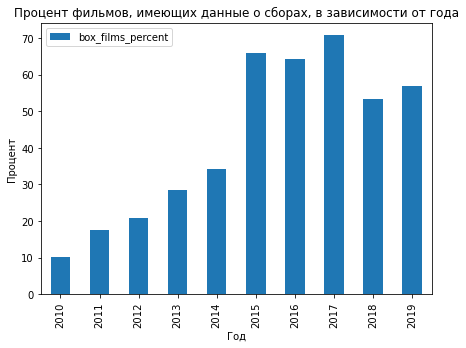

In [31]:
df_joined_films_by_year.plot.bar(y='box_films_percent', figsize=(7,5))
plt.title('Процент фильмов, имеющих данные о сборах, в зависимости от года')
plt.xlabel('Год')
plt.ylabel('Процент')
plt.show()

Изучим, как менялась динамика проката по годам

In [32]:
year_box_pivot = df_res.pivot_table(index='year', values='box_office', aggfunc='sum')
year_box_pivot

,box_office
year,
2010,"2,428,654.00"
2011,"14,102,765.00"
2012,"6,955,423.00"
2013,"29,799,706.20"
2014,"7,444,951,859.20"
2015,"39,497,365,196.40"
2016,"47,866,299,741.91"
2017,"48,563,707,217.51"
2018,"49,668,403,134.32"


**Выводы**

Минимальные сборы были в 2010. Но там и фильмов выходило меньше (101 фильм), дальше идёт 12 год (123 фильма).


В 18 было больше всего сборов. Сборы в 16, 17 и 19 годах чуть поменьше. Так же в 17 выходило меньше всего фильмов, соответственно можем сделать вывод, что в этот фильм выходило больше кассовых картин.

**Построим распределение сборов фильмов в зависимости от года**

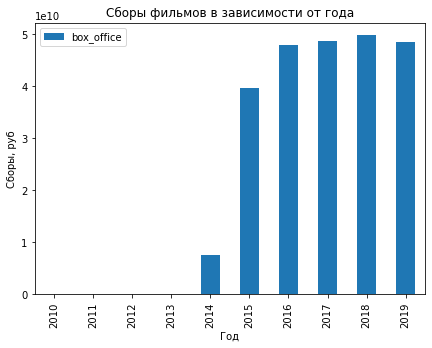

In [33]:
year_box_pivot.plot.bar(y='box_office', figsize=(7,5))
plt.title('Сборы фильмов в зависимости от года')
plt.xlabel('Год')
plt.ylabel('Сборы, руб')
plt.show()

**Выводы**

Графики наглядно показывают картину по сборам. 

Сборами до 14 года в принципе можно принебречь. В 14 было намного меньше сборов, чем в последующие года. В 15 сборы сильно выросли. С 16 года наблюдаются примерно одинаковые значения по сборам.

### Расчет средней и медианной суммы сборов для каждого года

In [34]:
df_res_mean_median_std = df_res.groupby('year').agg({'box_office':['mean', 'median', 'std']})
df_res_mean_median_std.columns = ['mean', 'median', 'std']
df_res_mean_median_std['median_mean_ratio'] = df_res_mean_median_std['median'] / df_res_mean_median_std['mean']
df_res_mean_median_std

,mean,median,std,median_mean_ratio
year,,,,
2010,"24,046.08","1,710.00","146,138.69",0.07
2011,"129,383.17","3,000.00","1,114,446.84",0.02
2012,"56,548.15","6,220.00","233,666.75",0.11
2013,"166,478.81","3,580.00","1,525,589.55",0.02
2014,"27,270,885.93","20,400.00","122,324,726.96",0.00
2015,"85,492,132.46","5,003,450.15","220,771,366.20",0.06
2016,"91,173,904.27","3,915,041.02","251,252,220.88",0.04
2017,"136,032,793.33","9,968,340.00","323,251,440.97",0.07
2018,"104,565,059.23","8,891,102.21","272,079,011.97",0.09


Средние и медианные значения ооочень сильно отличаются почти во всех годах. 
Это значит, что во все эти годы выходили фильмы, кассовые сборы которых довольно сильно отличались от медианных сборов за год

### Определение влияния возрастного рейтинга на сборы

In [35]:
df_res = df_res.query('year > 2014') #фильтр для года
df_res_year_age = df_res.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='median')
df_res_year_age

age_restriction,0,6,12,16,18
year,,,,,
2015,"2,949,808.55","20,380,982.20","15,959,668.30","4,784,781.50","4,616,614.70"
2016,"2,571,294.10","3,026,256.15","4,690,635.25","5,180,850.50","6,107,001.74"
2017,"22,178,956.00","51,992,103.00","9,010,548.00","9,702,077.00","8,212,677.00"
2018,"3,616,937.28","14,688,850.32","8,931,965.66","9,010,638.62","7,179,466.00"
2019,"3,885,434.50","12,875,350.34","3,405,545.76","3,210,717.81","5,603,216.55"


По сводной таблице видно, что возрастное ограничение довольно значительно влияет на общие сборы в прокате. И в зависимости от года ситуация так же изменяется.

Можно выделить общую тенденцию в возрастном ограничении в 6+, тут фильмы зарабатывают больше, чем в других группах. Это неудивительно, так как ограничение в 6+ захватывает бОльшую часть аудитории кинотеатров - и детей и взрослых, а соответственно и сборы будут выше.

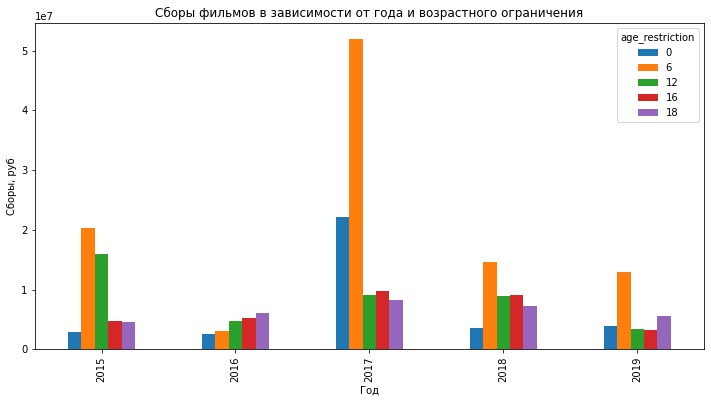

In [36]:
ax = df_res_year_age.plot.bar(figsize=(12,6))
plt.title('Сборы фильмов в зависимости от года и возрастного ограничения')
plt.xlabel('Год')
plt.ylabel('Сборы, руб')
plt.show()

## Исследование фильмов, которые получили государственную поддержку

### Окупаемость по жанрам

Создадим функцию для определения окупаемости фильма, где 

1 - фильм окупился

0 - не окупился

In [37]:
df_res = df_res.query('budget > 0')

def payback(row):
    box = row['box_office']
    budget = row['budget']
    
    if box > budget:
        return(1)
    else:
        return(0)
    
df_res['payback'] = df_res.apply(payback, axis=1) 

Теперь сделаем сводную таблицу окупаемости по жанрам, где будут три столбца: 

* Общее количество фильмов по жанрам

* Количество окупившихся фильмов по жанрам (сумма единичек и будет количеством окупившихся фильмов)

* Соотношение окупившихся фильмов к общему



In [38]:
genres_pivot = df_res.pivot_table(index='main_genre', values='payback', aggfunc=['count','sum'])
genres_pivot.columns = ['payback_count', 'payback_sum']
genres_pivot['payback_ratio'] = (genres_pivot['payback_sum'] / df_res['main_genre'].value_counts()).round(2)
genres_pivot.sort_values(by='payback_ratio', ascending=False)

,payback_count,payback_sum,payback_ratio
main_genre,,,
спорт,3,2,0.67
семейный,4,2,0.50
комедия,70,27,0.39
биография,3,1,0.33
военный,9,3,0.33
боевик,6,2,0.33
ужасы,10,3,0.30
мультфильм,29,8,0.28
история,4,1,0.25


Посмотрим ещё на круговые диаграммы

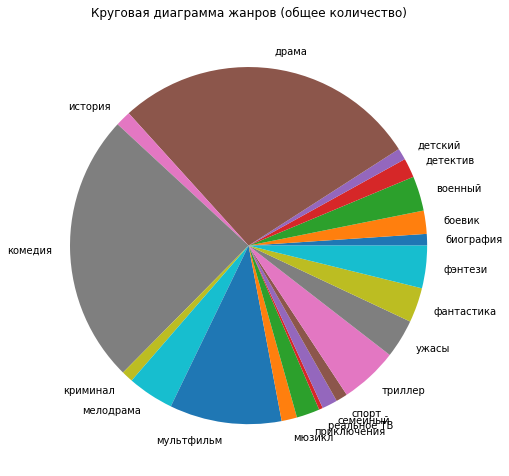

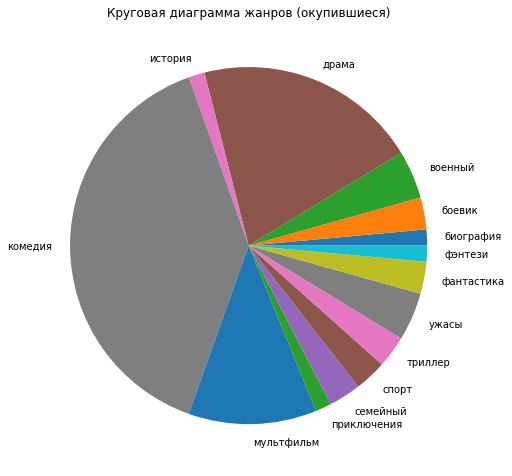

In [39]:
genres_pivot['payback_count'].plot(kind='pie', legend=False, figsize=(8,10))

plt.title('Круговая диаграмма жанров (общее количество)')
plt.ylabel('')
plt.show()

genres_pivot['payback_sum'].plot(kind='pie', legend=False, figsize=(8,10))

plt.title('Круговая диаграмма жанров (окупившиеся)')
plt.ylabel('')
plt.show()

**Выводы**

Диаграммы получились не очень наглядные, так как часть жанров в принципе пропали. Но некоторые выводы с этого всего всё же можно сделать:

* Если брать из всех жанров, то топ 3 по окупаемости - это жанры спорт (0.67), семейный (0.5), комедия (0.39)

* Средняя окупаемость у жанров военный (0.33), биография 0.33, боевик (0.33), ужасы (0.3) и мульфильм (0.28)

* При этом если общее количество фильмов жанров комедия и драма одинаково, то окупаемость комедий более чем в 2 раза выше

* Топ провалов по окупаемости среди жанров - это мелодрама (0), фэнтези (0.09) и триллер (0.13). Детективы, детские, мюзиклы и криминальные фильмы так же не окупаются (0)

### Окупаемость по возрастному ограничению

In [40]:
age_restr_pivot = df_res.pivot_table(index='age_restriction', values='payback', aggfunc=['count','sum'])
age_restr_pivot.columns = ['payback_count', 'payback_sum']
age_restr_pivot['payback_ratio'] = (age_restr_pivot['payback_sum'] / df_res['age_restriction'].value_counts()).round(2)
age_restr_pivot.sort_values(by='payback_ratio', ascending=False)

,payback_count,payback_sum,payback_ratio
age_restriction,,,
12,94,28,0.30
6,64,17,0.27
16,113,22,0.19
18,26,3,0.12
0,3,0,0.00


**Выводы**

* Больше всего окупаются фильмы в категории 12+ (0.3) и 6+ (0.27)

* Фильмы в категории 18+ практически не окупаются (0.12)

### Оценки в зависимости от наличия гос.финансирования

Построим гистограммы рейтингов фильмов, которые получили гос.финансирование, и которые его не получили

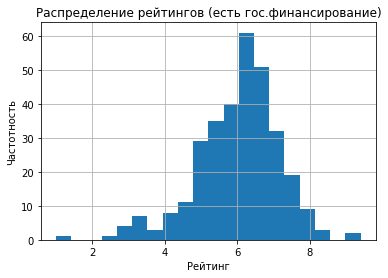

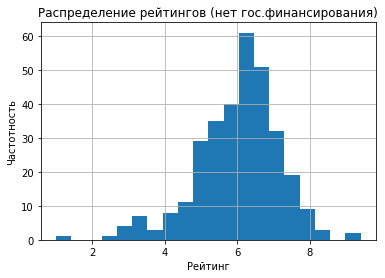

In [41]:
have_gov_budget = df.query('budget > 0')
have_gov_budget['ratings'].hist(bins=20)
plt.title('Распределение рейтингов (есть гос.финансирование)')
plt.xlabel('Рейтинг')
plt.ylabel('Частотность')
plt.show()

dont_have_gov_budget = df.query('budget > 0')
dont_have_gov_budget['ratings'].hist(bins=20)
plt.title('Распределение рейтингов (нет гос.финансирования)')
plt.xlabel('Рейтинг')
plt.ylabel('Частотность')
plt.show()

Так же сделаем описание столбца рейтинга

In [42]:
have_gov_budget['ratings'].describe()

count   316.00
mean      6.02
std       1.15
min       1.00
25%       5.30
50%       6.20
75%       6.70
max       9.40
Name: ratings, dtype: float64

In [43]:
dont_have_gov_budget['ratings'].describe()

count   316.00
mean      6.02
std       1.15
min       1.00
25%       5.30
50%       6.20
75%       6.70
max       9.40
Name: ratings, dtype: float64

**Выводы**

Наблюдаем такую картину - рейтинги фильмов без гос.финансирования выше как по среднему, так и по медианному значению (примерно на 0.5 балла)

### Влияние количества бюджетных средств

Построим матрицу корреляции по 4 параметрам

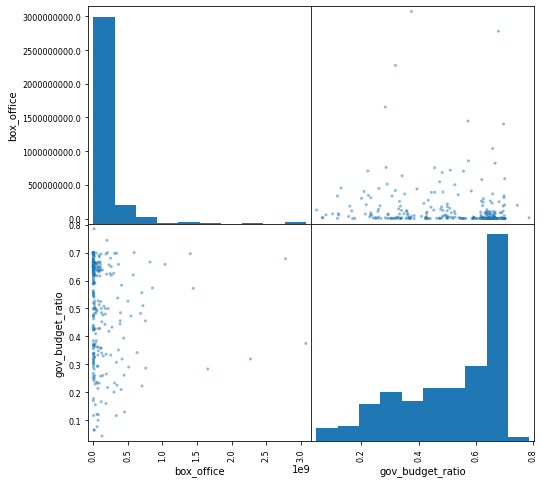

In [44]:
df_res = df_res.query('gov_budget_ratio < 1')
factors = df_res[
    ['box_office', 'gov_budget_ratio']]
pd.plotting.scatter_matrix(factors, figsize=(8,8))
plt.show()

Добавим к этому таблицу корреляции по кассовым сборам

In [45]:
factors.corr()['box_office'].sort_values()

gov_budget_ratio   -0.10
box_office          1.00
Name: box_office, dtype: float64

**Выводы**

Самый главный вывод это то, что размер государственного финансирования практически не влияет на сборы и соответственно интерес зрителя. 

## Общий вывод

Возвращаясь к первоначальному вопросу "Какие фильмы интересны зрителю?" можно сказать, что это фильмы жанров спорт, семейный и комедия в возрастной категории 6+ и 12+.

Наименее интересными жанрами являются мелодрама, фэнтези и триллер. Фильмы в жанре детективы, детские, мюзиклы и криминальные  так же не окупаются.

Кроме того, мы увидели, что размер государственного финансирования мало влияет на окупаемость фильма, а соответственно и на интерес зрителя.